In [2]:
from sklearn.datasets import load_breast_cancer
canserdata=load_breast_cancer()
print('Shape Of the data:', canserdata.data.shape, '--- Shape Of the Target:', canserdata.target.shape)


Shape Of the data: (569, 30) --- Shape Of the Target: (569,)


# Preprocessing

In [3]:
#splitting train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(canserdata.data, canserdata.target, test_size=0.2)
print('Shape Of the x-train:',xtrain.shape ,'--- Shape Of the x-test:',xtest.shape, '--- Shape Of the y-train:',ytrain.shape, '--- Shape Of the y-test:', ytest.shape)

Shape Of the x-train: (455, 30) --- Shape Of the x-test: (114, 30) --- Shape Of the y-train: (455,) --- Shape Of the y-test: (114,)


In [4]:
#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

# Classification

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def model_metrics (ytrain, ytest, predicted_ytrain, predicted_ytest):
 accuracy_train= accuracy_score(y_true=ytrain, y_pred=predicted_ytrain)
 accuracy_test=accuracy_score(y_true=ytest, y_pred=predicted_ytest)
 precision_test=precision_score(y_true=ytest, y_pred=predicted_ytest)
 recall_test=recall_score(y_true=ytest, y_pred=predicted_ytest)

 print('ccuracy_train:', accuracy_train,'--- accuracy_test:', accuracy_test, '--- precision_test:', precision_test,'--- recall_test:', recall_test )

 return(accuracy_train,accuracy_test,precision_test,recall_test)

## 1.Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [7]:
predicted_ytrain=model.predict(xtrain)
predicted_ytest=model.predict(xtest)
naivebayes_accuracy_train,naivebayes_accuracy_test,naivebayes_precision_test,naivebayes_recall_test= model_metrics(ytrain, ytest, predicted_ytrain, predicted_ytest)

ccuracy_train: 0.9384615384615385 --- accuracy_test: 0.956140350877193 --- precision_test: 0.9436619718309859 --- recall_test: 0.9852941176470589


## 2.KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6, leaf_size=30,algorithm='brute')
model.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='brute', n_neighbors=6)

In [9]:
predicted_ytrain=model.predict(xtrain)
predicted_ytest=model.predict(xtest)
KNN_accuracy_train,KNN_accuracy_test,KNN_precision_test,KNN_recall_test=model_metrics(ytrain, ytest, predicted_ytrain, predicted_ytest)

ccuracy_train: 0.978021978021978 --- accuracy_test: 0.9736842105263158 --- precision_test: 0.9710144927536232 --- recall_test: 0.9852941176470589


## 3. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(min_samples_split=50,criterion='entropy',)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [11]:
ptrdicted_ytrain=model.predict(xtrain)
predicted_ytest=model.predict(xtest)
DecisionTree_accuracy_train,DecisionTree_accuracy_test,DecisionTree_precision_test,DecisionTree_recall_test=model_metrics(ytrain, ytest, predicted_ytrain, predicted_ytest)

ccuracy_train: 0.978021978021978 --- accuracy_test: 0.9473684210526315 --- precision_test: 0.9696969696969697 --- recall_test: 0.9411764705882353


## 4. Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=300, criterion='log_loss', max_depth=100, min_samples_leaf=10)
model.fit (xtrain,ytrain)

RandomForestClassifier(criterion='log_loss', max_depth=100, min_samples_leaf=10,
                       n_estimators=300)

In [13]:
predicted_ytrain=model.predict(xtrain)
predicted_ytest=model.predict(xtest)

RandomForest_accuracy_train,RandomForest_accuracy_test,RandomForest_precision_test,RandomForest_recall_test=model_metrics(ytrain, ytest, predicted_ytrain, predicted_ytest)

ccuracy_train: 0.9736263736263736 --- accuracy_test: 0.956140350877193 --- precision_test: 0.9436619718309859 --- recall_test: 0.9852941176470589


## 5. SVM

In [14]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit (xtrain,ytrain)

SVC()

In [15]:
predicted_ytrain=model.predict(xtrain)
predicted_ytest=model.predict(xtest)
SVC_accuracy_train,SVC_accuracy_test,SVC_precision_test,SVC_recall_test=model_metrics(ytrain, ytest, predicted_ytrain, predicted_ytest)

ccuracy_train: 0.9824175824175824 --- accuracy_test: 0.9736842105263158 --- precision_test: 0.9710144927536232 --- recall_test: 0.9852941176470589


## 6. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs')
model.fit (xtrain, ytrain)

LogisticRegression()

In [70]:
predicted_ytrain=model.predict(xtrain)
predicted_ytest=model.predict(xtest)
LogisticRegression_accuracy_train,LogisticRegression_accuracy_test,LogisticRegression_precision_test,LogisticRegression_recall_test=model_metrics(ytrain, ytest, predicted_ytrain, predicted_ytest)

ccuracy_train: 0.9758241758241758 --- accuracy_test: 0.9824561403508771 --- precision_test: 0.9852941176470589 --- recall_test: 0.9852941176470589


## 7. ANN

In [59]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(activation='relu',solver='adam', hidden_layer_sizes=65)
model.fit(xtrain,ytrain)

c:\Users\ASUS\projectvenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=65)

In [60]:
predicted_ytrain=model.predict(xtrain)
predicted_ytest=model.predict(xtest)
MLP_accuracy_train,MLP_accuracy_test,MLP_precision_test,MLP_recall_test=model_metrics(ytrain, ytest, predicted_ytrain, predicted_ytest)

ccuracy_train: 0.9758241758241758 --- accuracy_test: 0.9824561403508771 --- precision_test: 0.9852941176470589 --- recall_test: 0.9852941176470589


# Comparison

## models accuracy (train data)

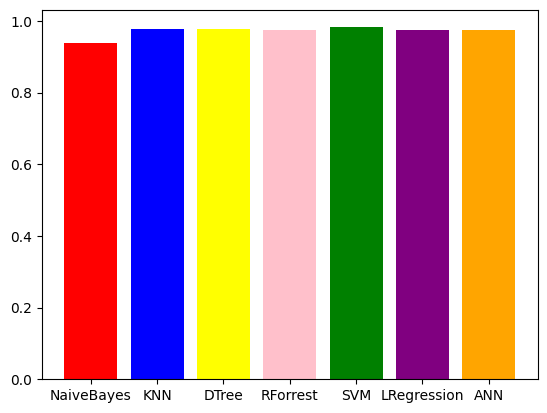

In [68]:
import matplotlib.pyplot as plt

accuracy= [naivebayes_accuracy_train, KNN_accuracy_train, DecisionTree_accuracy_train, RandomForest_accuracy_train, SVC_accuracy_train, LogisticRegression_accuracy_train, MLP_accuracy_train]
models=['NaiveBayes', 'KNN', 'DTree', 'RForrest', 'SVM', 'LRegression', 'ANN']
colors= ['red','blue','yellow','pink', 'green','purple', 'orange' ]

plt.bar(models,accuracy, color=colors)
plt.show()



## accuracies of test data

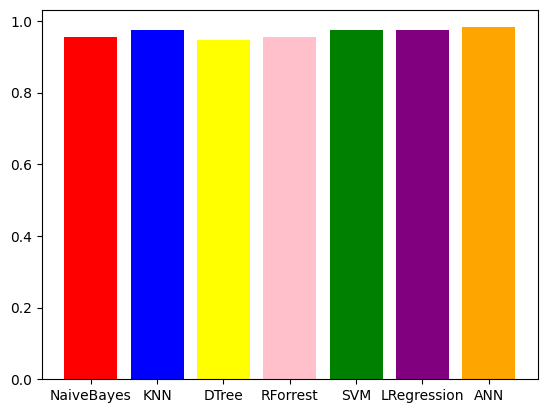

In [69]:

accuracy= [naivebayes_accuracy_test, KNN_accuracy_test, DecisionTree_accuracy_test, RandomForest_accuracy_test, SVC_accuracy_test, LogisticRegression_accuracy_test, MLP_accuracy_test]
models=['NaiveBayes', 'KNN', 'DTree', 'RForrest', 'SVM', 'LRegression', 'ANN']
colors= ['red','blue','yellow','pink', 'green','purple', 'orange' ]

plt.bar(models,accuracy, color=colors)
plt.show()


## precisions

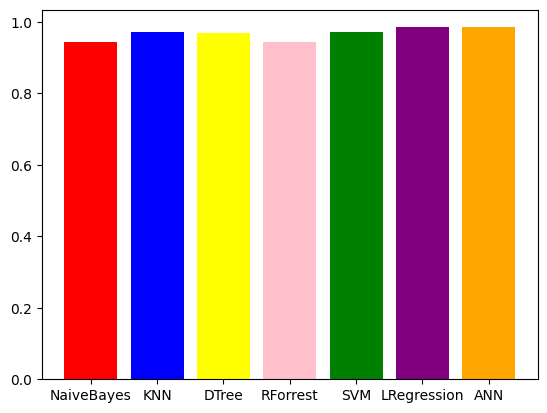

In [72]:

precision= [naivebayes_precision_test, KNN_precision_test, DecisionTree_precision_test, RandomForest_precision_test, SVC_precision_test, LogisticRegression_precision_test, MLP_precision_test]
models=['NaiveBayes', 'KNN', 'DTree', 'RForrest', 'SVM', 'LRegression', 'ANN']
colors= ['red','blue','yellow','pink', 'green','purple', 'orange' ]

plt.bar(models,precision, color=colors)
plt.show()


## Recalls

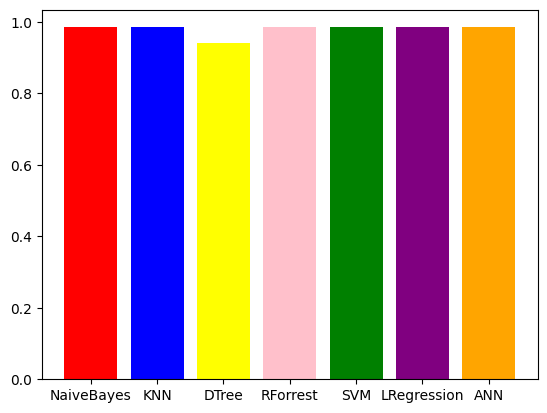

In [73]:

Recalls= [naivebayes_recall_test, KNN_recall_test, DecisionTree_recall_test, RandomForest_recall_test, SVC_recall_test, LogisticRegression_recall_test, MLP_recall_test]
models=['NaiveBayes', 'KNN', 'DTree', 'RForrest', 'SVM', 'LRegression', 'ANN']
colors= ['red','blue','yellow','pink', 'green','purple', 'orange' ]

plt.bar(models,Recalls, color=colors)
plt.show()
